# Introduction to Classification 
## Due 04/27/20 @ 11:59 PM

In [1]:
# Load the modules we'll need
from datascience import *
import numpy as np
import random
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from collections import Counter
from client.api.notebook import Notebook

plt.style.use('fivethirtyeight')

Today we'll explore the task of classification by seeing whether we can successfully predict a cell type given gene expression measurements. To do so, we'll use single-cell RNA-seq data from mesenteric adipose tissue, a type of fat which encircles the large intestine. These data come from mice and consist of a number of different cell types. Let's start by loading the data, which has already been normalized, but not log-transformed.

In [2]:
# Load expression data and annotation file
sc_exp = pd.read_csv('MAT_expression.csv', index_col = 0)
sc_annot = pd.read_csv('MAT_annotation.csv', index_col = 0)

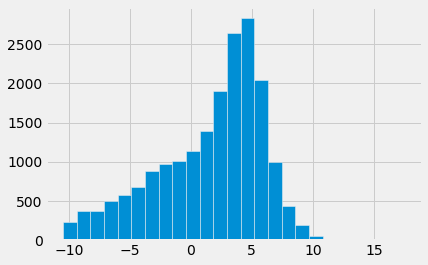

In [40]:
#gene_means = np.mean(sc_exp, axis = 1)
plt.hist(np.log2(gene_means), bins = 25)
plt.show()

np.round(sc_exp.loc[(np.log2(gene_means) > 1),:], 2).to_csv('smaller_exp.csv')

Classification is usually a supervised learning task. This means we have data for which we know the true class labels and want to build a model which can predict the label for new data based on what we've already observed. We hence want to get the labels and "features" for our data to prepare to build our model.

In [3]:
# Extract the cell type labels and gene expression values for all the cells. 
sc_labels = sc_annot.cell_ontology_class[:]   # The [:] prevents aliasing and generates a new copy
sc_features = sc_exp.T                 # We need to transpose our data to apply the classifier
Counter(sc_labels)

Counter({'CD8-positive, alpha-beta T cell': 200,
         'macrophage': 216,
         'CD4-positive, alpha-beta T cell': 167,
         'mesenchymal stem cell of adipose': 1369,
         'B cell': 342,
         'endothelial cell': 221,
         'myeloid cell': 201,
         'T cell': 63,
         'NK cell': 43,
         'epithelial cell': 31})

One of the key components of model building is splitting our data into training and test sets. We use the training set to construct our model and then evaluate its performance on the test set. There are many ways to split into training and test sets, but our data are amenable to doing so in the most straightforward fashion. Fortunately, there's a handy function that will do everything for us.

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sc_features, sc_labels, test_size=0.5)

Having split our data, we are now ready to train our model. We're going to use a machine learning algorithm known as a random forest. Go ahead and run the following cell to build the classifier.

In [5]:
# Fit model
clf=RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We now want to compute the error rates on our traning and test sets. We can use the model to make predictions and then compare to what we know to be the truth.

In [6]:
# Compute train and test errors
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = np.mean(y_train_pred == y_train)
test_acc = np.mean(y_test_pred == y_test)

print('Our training accuracy is ' + str(np.round(train_acc, 3)) + ' and our test accuracy is ' + str(np.round(test_acc, 3)) + '.')


Our training accuracy is 1.0 and our test accuracy is 0.947.


The confusion matrix is a useful way to visualize the performance of our algorithm. It shows how predictions compare to the truth for each class. Perfect classification would be a diagonal matrix (rows display true labels, columns what was prediced).

In [7]:
# Produce confusion matrix.
pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.unique(sc_annot.cell_ontology_class), 
             columns = np.unique(sc_annot.cell_ontology_class))


,B cell,"CD4-positive, alpha-beta T cell","CD8-positive, alpha-beta T cell",NK cell,T cell,endothelial cell,epithelial cell,macrophage,mesenchymal stem cell of adipose,myeloid cell
B cell,153,0,0,0,0,0,0,0,0,0
"CD4-positive, alpha-beta T cell",1,67,11,0,0,0,0,0,0,0
"CD8-positive, alpha-beta T cell",0,13,87,0,0,0,0,0,0,0
NK cell,0,0,4,18,0,0,0,0,0,0
T cell,0,4,7,0,21,0,0,0,0,0
endothelial cell,0,0,0,0,0,114,0,0,1,0
epithelial cell,4,2,1,0,0,4,5,2,0,0
macrophage,2,0,0,0,0,0,0,93,0,14
mesenchymal stem cell of adipose,0,0,0,0,0,0,0,0,701,0
myeloid cell,1,0,0,0,0,0,0,5,0,92


Let's generate plots of our data with the true and predicted labels to see how it does. We'll start by running t-SNE so that we can visualize our cell type clusters.

In [8]:
# Produce t-SNE embeddings
x = StandardScaler().fit_transform(np.log2(X_test+1))
pca = PCA(n_components = 50)
principalComponents = pca.fit_transform(x)
tsne = TSNE(n_components = 2)
X_embedded = tsne.fit_transform(principalComponents)

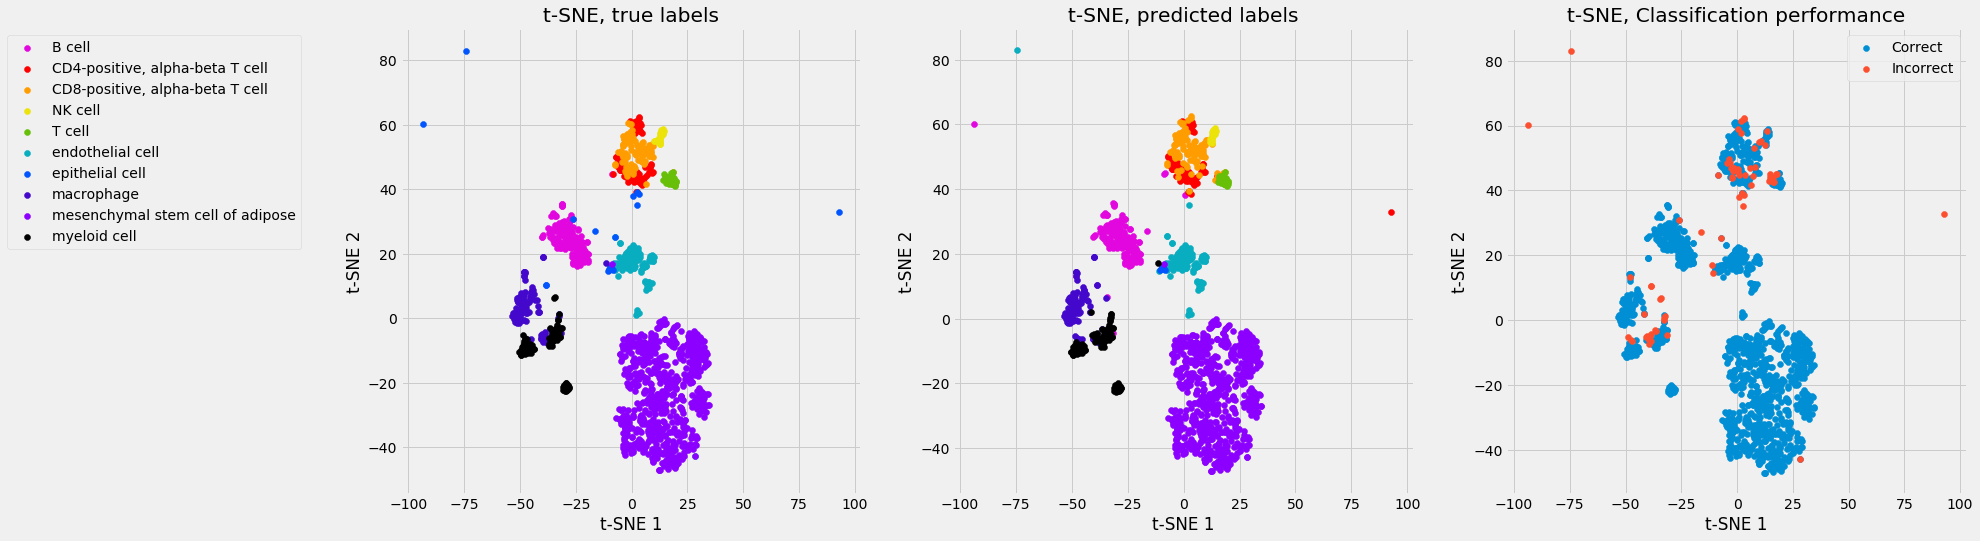

In [9]:
# Make a plot which colors points by the true labels, predicted labels, and whether the classifier was correct or not.
cell_types = np.unique(sc_annot.cell_ontology_class)
color_dict = {cell_types[0] : '#e307df', cell_types[1] : '#ff0000', 
              cell_types[2] : '#ff9d00', cell_types[3] : '#ebe309',
              cell_types[4] : '#67bf08', cell_types[5] : '#08adbf',
              cell_types[6] : '#0055ff', cell_types[7] : '#4308cc',
              cell_types[8] : '#8c00ff', cell_types[9] : '#000000'}
              
plt.figure(figsize=(25,8))
plt.subplot(131)
for a in cell_types:
    plt.scatter(X_embedded[y_test == a,0], X_embedded[y_test == a,1], color = color_dict[a])
plt.legend(cell_types, bbox_to_anchor = (-.2,1))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE, true labels')

plt.subplot(132)
for a in cell_types:
    plt.scatter(X_embedded[y_test_pred == a,0], X_embedded[y_test_pred == a,1], color = color_dict[a])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE, predicted labels')

plt.subplot(133)
plt.scatter(X_embedded[y_test_pred == y_test,0], X_embedded[y_test_pred == y_test,1])
plt.scatter(X_embedded[y_test_pred != y_test,0], X_embedded[y_test_pred != y_test,1])
plt.legend(['Correct','Incorrect'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE, Classification performance')
plt.show()

Random forests produce a quantity known as feature importances which (hopefully) tell us about how useful certain features are when trying to discriminate among classes. Thus, in theory, features with high importances are relevant for identifying class membership. It's not always so pretty in reality, but it's a good starting point for finding genes which are cell type markers.

In [10]:
# Feature importances. Let's look at the top genes
feature_imp = pd.Series(clf.feature_importances_,index = X_train.T.index)
feature_imp.sort_values(ascending=False)[0:50]

index
Col1a2           0.007589
Dpt              0.007351
Gsn              0.007152
Pcolce           0.006913
Ms4a4d           0.006552
Cd34             0.006474
H2-Ab1           0.006470
H2-Aa            0.006406
Fxyd1            0.006325
Sparc            0.006294
Col3a1           0.006245
Col6a1           0.005857
Serpinh1         0.005491
Sod3             0.005419
Prkcdbp          0.005367
Tnxb             0.005305
Gpc3             0.005191
Cd79b            0.005108
H2-Eb1           0.004965
Cd248            0.004891
Dcn              0.004799
Cd83             0.004718
Lrrc61           0.004684
Ogn              0.004666
Serping1         0.004346
Htra3            0.004266
Ly6d             0.004155
Ifitm3           0.004032
Faim3            0.003816
Htra1            0.003715
Scara5           0.003715
Rbp1             0.003653
C1s              0.003581
Loxl2            0.003445
Gstm2            0.003444
Clec3b           0.003443
Cd19             0.003408
Mmp23            0.003363
Lyz2  

Let's look at a histogram of the feature importances. Many of them are zero and the scale is quite compressed, so we'll need to add 1e-10 and then apply np.log10 to get something useful.

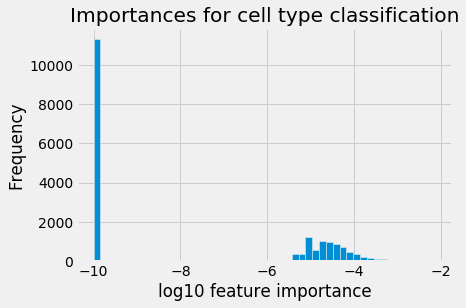

In [11]:
plt.hist(np.log10(feature_imp+1e-10), bins = 50)
plt.xlabel('log10 feature importance')
plt.ylabel('Frequency')
plt.title('Importances for cell type classification')
plt.show()

The manner in which we split our data into training and test sets will affect our model's performance. One factor that affects things is the fraction of data which is training or test. We can change this using the 'test_size' parameter in train_test_split. Let's build a for loop to see how this quantity affects our accuracy rate.

In [12]:
# Let's re-train with a different class imbalance. How do the confusion matrices compare?
test_acc = []
for i in [.9, .8, .7, .6, .5, .4, .3, .2, .1]:
    X_train, X_test, y_train, y_test = train_test_split(sc_features, sc_labels, test_size=1-i)
    clf=RandomForestClassifier(n_estimators = 200)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    test_acc.append(np.mean(y_test_pred == y_test))

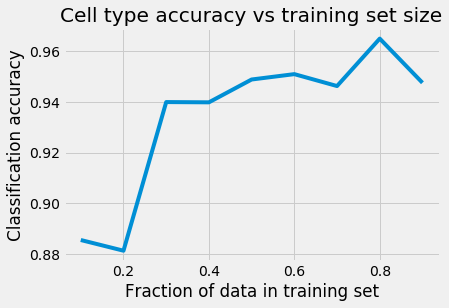

In [13]:
plt.plot([.9, .8, .7, .6, .5, .4, .3, .2, .1], test_acc)
plt.xlabel('Fraction of data in training set')
plt.ylabel('Classification accuracy')
plt.title('Cell type accuracy vs training set size')
plt.show()

Feature selection (and model selection) is another crucial component of classification tasks. Essentially, if we have many features, it may not be optimal to use all of them to build the model and we need some way to figure out what to keep and what to discard. One thing we can do is look at the accuracy on the test set as a function of the features we choose to keep. Let's see how our model performs when we truncate at different values of the feature importance.

In [14]:
# Let's re-train with fewer features (genes). How do the errors compare?
X_train, X_test, y_train, y_test = train_test_split(sc_features, sc_labels, test_size=.5)
clf=RandomForestClassifier(n_estimators = 200)

test_acc = []
for i in [0, 1e-6, 1e-5, 1e-4, 1e-3, .2e-2]:
    X_train_sub = X_train.T[feature_imp >= i].T
    X_test_sub = X_test.T[feature_imp >= i].T

    clf.fit(X_train_sub, y_train)
    # Compute train and test errors
    y_test_pred = clf.predict(X_test_sub)
    test_acc.append(np.mean(y_test_pred == y_test))

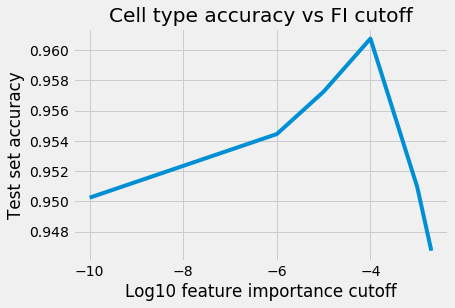

In [15]:
plt.plot(np.log10([1e-10, 1e-6, 1e-5, 1e-4, 1e-3, .2e-2]), test_acc)
plt.xlabel('Log10 feature importance cutoff')
plt.ylabel('Test set accuracy')
plt.title('Cell type accuracy vs FI cutoff')
plt.show()

# (Q1) Why didn't we need to log transform our data prior to training our random forest classifier? (Hint: Recall how splits are performed at each step)

### Answer:

# (Q2) Compare the training and test accuracies that we got when we first ran the classifier. Which is higher? Why do you think that is?

### Answer:

# (Q3) Consider the confusion matrix we displayed earlier. Which cell types were the hardest to distinguish? Does this make sense?

### Answer:


# (Q4) How do you interpret the histogram of gene importances with respect to the utility of certain genes to differentiate different cell types?

### Answer:

# (Q5) Look at the list of genes that have large importances. There should be two gene prefixes (the first few characters of the gene names) which show up at least three times. Identify these two "families". Look up a few of the genes online. Do their functions make sense given the cell types in question?

### Answer: 


# (Q6) How does test accuracy seem to relate to the fraction of the data on which we train? Why do you think that is?

### Answer:

# (Q7) How does test accuracy seem to relate to the gene importance cutoff used? Why do you think that is? It may look like an odd shape, but there's a reason for it.

### Answer:

# (Q8) Recall our use of k-means in the prior lab, or imagine what would happen if we had used it here. Do you think k-means or our classifier would do a better job of separating cell types? Why?

### Answer:



# (Q9) What is the primary difference between clustering and classification that leads to this gap in performance?

### Answer:


# (Q10) How would you assess the overall success of our classifier in this problem?

### Answer:

# Submit


In [16]:
ok = Notebook('Lab08_Classification.ok')
_ = ok.auth(inline=True)

In [17]:
# Submit the assignment
_ = ok.submit()